In [1]:
from myimports import *

In [2]:
warnings.simplefilter("ignore")

In [3]:
sns.set_style("whitegrid")
cwd = os.path.dirname(os.getcwd())
data_dir = os.path.join(os.path.dirname(os.getcwd()), 'data')
doc_dir = os.path.join(os.path.dirname(os.getcwd()), 'docs')

In [4]:
sfnc_pairs = sio.loadmat(os.path.join(data_dir,'sfnc_pairs.mat'))
sfnc_corr_pairs = sfnc_pairs['fnc_corrs']

In [5]:
demographics = pd.read_excel(os.path.join(data_dir, '20160420_vcalhoun_rest_demography_cag_info_new.xls'))

In [7]:
X = sfnc_corr_pairs
demographics["HD_near"] =  (demographics.cap_d_group=="med")*1
y_diagnosed = demographics["visit_diagnosis_ID"].values
y_controls = demographics.cap_d_group_id2.values
X_near = X[demographics["HD_near"]==1]
X_near = X_near[y_diagnosed[demographics["HD_near"]==1]==0]
X_controls = X[y_controls==0]

X = pd.concat([pd.DataFrame(X_near), pd.DataFrame(X_controls)], axis=0)
y = np.append(np.ones(np.shape(X_near)[0]), np.zeros(np.shape(X_controls)[0]))

In [8]:
1-np.sum(y)/np.shape(y)[0]

0.6141732283464567

In [9]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y),
                                                    test_size=0.2,
                                                    stratify=y)

In [10]:
def print_plots(acc_matrix, f1_matrix, auc_matrix, xlim_vec):
    classifier_labels = ['lr', 'svc', 'rbf', 'rf', 'knn']
    algo_labels = ['BetaGamma', 'DISR', 'CIFE', 'CMIM', 'CondMI', 'Condred']
    for i in range(acc_matrix.shape[0]):
        plt.figure(i)
        for j in range(acc_matrix.shape[2]):
            plt.plot(xlim_vec, acc_matrix[i, :, j], label=str(classifier_labels[j]), linestyle=':')
            plt.title('Accuracy - ' + algo_labels[i])
            plt.legend()

        plt.show()

    for i in range(acc_matrix.shape[0]):
        plt.figure(i)
        for j in range(acc_matrix.shape[2]):
            plt.plot(xlim_vec, f1_matrix[i, :, j], label=str(classifier_labels[j]), linestyle=':')
            plt.title('F1 - ' + algo_labels[i])
            plt.legend()

        plt.show()

    for i in range(acc_matrix.shape[0]):
        plt.figure(i)
        for j in range(acc_matrix.shape[2]):
            plt.plot(xlim_vec, auc_matrix[i, :, j], label=str(classifier_labels[j]), linestyle=':')
            plt.title('AUC - ' + algo_labels[i])
            plt.legend()

        plt.show()

In [11]:
# # Grid_Search_Logistic-Regression
lr_base = LogisticRegression(max_iter=1e6, random_state=1)
penalty = ['l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
lr = GridSearchCV(lr_base, hyperparameters, cv=5, verbose=0)

# Grid_Search_Linear-SVM
svc_base = LinearSVC(random_state=1)
gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(C=C)
svc = GridSearchCV(svc_base, param_grid, cv=5, verbose=0)

# Grid_Search_Kernel-SVM
rbf_base = SVC(random_state=1)
param_grid = dict(C=C, gamma=gamma)
rbf = GridSearchCV(rbf_base, param_grid, cv=5, verbose=0)

# Grid_Search_RF
rf_base = RandomForestClassifier(random_state=1)
n_estimators = [5, 10, 15, 20, 25, 50, 100]
max_depths = np.linspace(1, 10, 10, endpoint=True)
param_grid = dict(n_estimators=n_estimators, max_depth=max_depths)
rf = GridSearchCV(rf_base, param_grid, cv=5, verbose=0)

# Grid_Search_kNNClassifier
knn_base  = KNeighborsClassifier()
n_neighbors = range(2, 11)
param_grid = dict(n_neighbors=n_neighbors)
knn = GridSearchCV(knn_base, param_grid, cv=5, verbose=0)

In [12]:
algo_labels = ['BetaGamma', 'DISR', 'CIFE', 'CMIM', 'Condred']
algos = [BetaGamma, DISR, CIFE, CMIM, Condred]
algo_dict = dict(zip(algo_labels, algos))

In [13]:
num_features_list = range(25, 501, 25)
    
select_features = dict()

for key, algo in algo_dict.items():
    select_features[key] = dict()
    for num_features in num_features_list:
        print(key, num_features)
        select_features[key][num_features] = algo(X_train, y_train, num_features)

('BetaGamma', 25)
('BetaGamma', 50)
('BetaGamma', 75)
('BetaGamma', 100)
('BetaGamma', 125)
('BetaGamma', 150)
('BetaGamma', 175)
('BetaGamma', 200)
('BetaGamma', 225)
('BetaGamma', 250)
('BetaGamma', 275)
('BetaGamma', 300)
('BetaGamma', 325)
('BetaGamma', 350)
('BetaGamma', 375)
('BetaGamma', 400)
('BetaGamma', 425)
('BetaGamma', 450)
('BetaGamma', 475)
('BetaGamma', 500)
('DISR', 25)
('DISR', 50)
('DISR', 75)
('DISR', 100)
('DISR', 125)
('DISR', 150)
('DISR', 175)
('DISR', 200)
('DISR', 225)
('DISR', 250)
('DISR', 275)
('DISR', 300)
('DISR', 325)
('DISR', 350)
('DISR', 375)
('DISR', 400)
('DISR', 425)
('DISR', 450)
('DISR', 475)
('DISR', 500)
('CIFE', 25)
('CIFE', 50)
('CIFE', 75)
('CIFE', 100)
('CIFE', 125)
('CIFE', 150)
('CIFE', 175)
('CIFE', 200)
('CIFE', 225)
('CIFE', 250)
('CIFE', 275)
('CIFE', 300)
('CIFE', 325)
('CIFE', 350)
('CIFE', 375)
('CIFE', 400)
('CIFE', 425)
('CIFE', 450)
('CIFE', 475)
('CIFE', 500)
('Condred', 25)
('Condred', 50)
('Condred', 75)
('Condred', 100)
('Co

In [14]:
classifiers = [lr, svc, rbf, rf, knn]
classifier_labels = ['lr', 'svc', 'rbf', 'rf', 'knn']
    
acc_matrix = np.zeros((len(algos), len(num_features_list), len(classifiers)))
f1_matrix = np.zeros(acc_matrix.shape)
auc_matrix = np.zeros(f1_matrix.shape)

best_params = dict()

start = time.time()
for i, label in enumerate(algo_labels):
    for j, num_features in enumerate(num_features_list):
        select_feature_index = select_features[label][num_features]

        X_train_select = X_train[:, np.array(select_feature_index).astype(int)]
        y_train_select = y_train

        X_test_select = X_test[:, np.array(select_feature_index).astype(int)]
        y_test_select = y_test

        for k, classifier in enumerate(classifiers):
            classifier.fit(X_train_select, y_train_select)
            index = '_'.join([str(z) for z in (algo_labels[i], num_features, classifier_labels[k])])
            print(index)
            best_params[index] = classifier.best_params_

            y_pred = classifier.predict(X_test_select)
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_select, y_pred, pos_label=1)

            acc_matrix[i, j, k] = accuracy_score(y_test_select, y_pred)
            f1_matrix[i, j, k] = f1_score(y_test_select, y_pred, pos_label=1)
            auc_matrix[i, j, k] = auc(false_positive_rate, true_positive_rate)

end = time.time()

print(end - start)

BetaGamma_25_lr
BetaGamma_25_svc
BetaGamma_25_rbf
BetaGamma_25_rf
BetaGamma_25_knn
BetaGamma_50_lr
BetaGamma_50_svc
BetaGamma_50_rbf
BetaGamma_50_rf
BetaGamma_50_knn
BetaGamma_75_lr
BetaGamma_75_svc
BetaGamma_75_rbf
BetaGamma_75_rf
BetaGamma_75_knn
BetaGamma_100_lr
BetaGamma_100_svc
BetaGamma_100_rbf
BetaGamma_100_rf
BetaGamma_100_knn
BetaGamma_125_lr
BetaGamma_125_svc
BetaGamma_125_rbf
BetaGamma_125_rf
BetaGamma_125_knn
BetaGamma_150_lr
BetaGamma_150_svc
BetaGamma_150_rbf
BetaGamma_150_rf
BetaGamma_150_knn
BetaGamma_175_lr
BetaGamma_175_svc
BetaGamma_175_rbf
BetaGamma_175_rf
BetaGamma_175_knn
BetaGamma_200_lr
BetaGamma_200_svc
BetaGamma_200_rbf
BetaGamma_200_rf
BetaGamma_200_knn
BetaGamma_225_lr
BetaGamma_225_svc
BetaGamma_225_rbf
BetaGamma_225_rf
BetaGamma_225_knn
BetaGamma_250_lr
BetaGamma_250_svc
BetaGamma_250_rbf
BetaGamma_250_rf
BetaGamma_250_knn
BetaGamma_275_lr
BetaGamma_275_svc
BetaGamma_275_rbf
BetaGamma_275_rf
BetaGamma_275_knn
BetaGamma_300_lr
BetaGamma_300_svc
BetaGamma_30

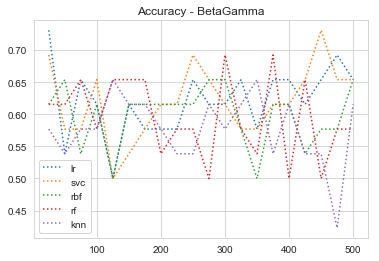

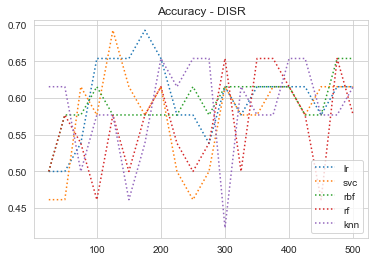

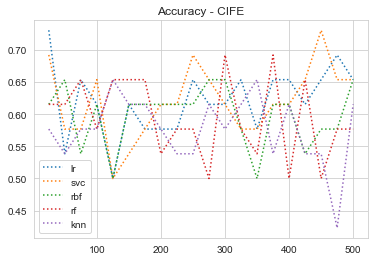

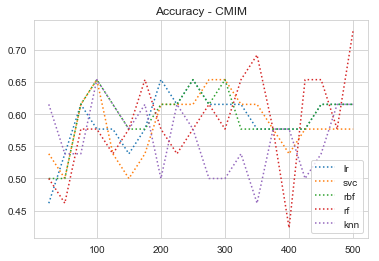

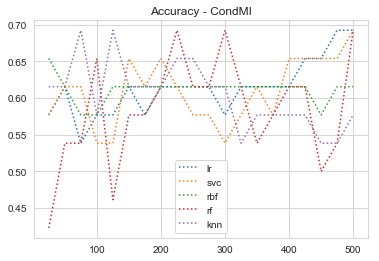

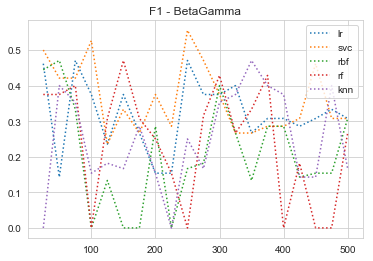

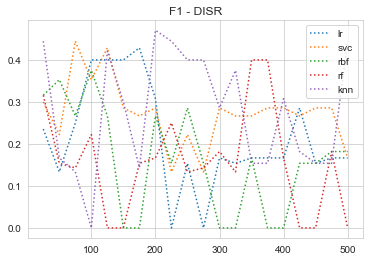

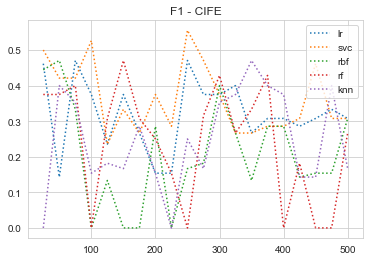

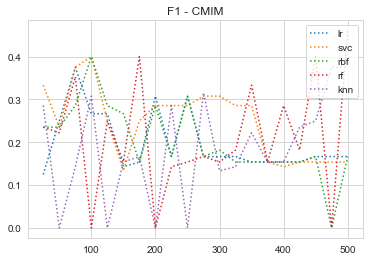

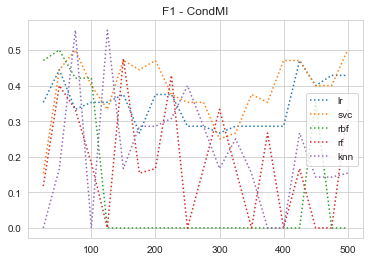

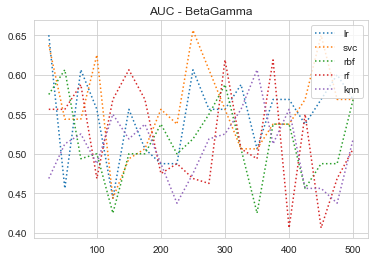

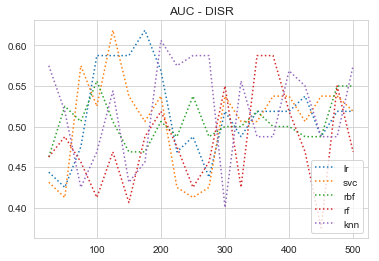

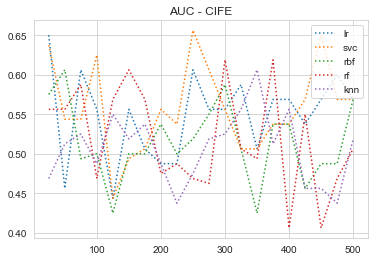

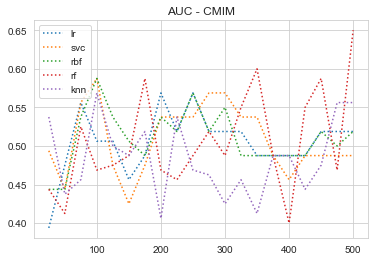

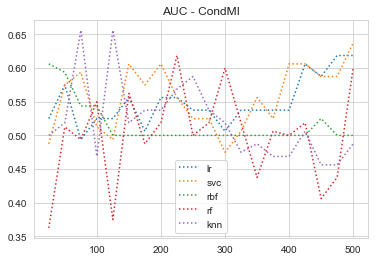

In [15]:
print_plots(acc_matrix, f1_matrix, auc_matrix, num_features_list)